In [1]:
import nsp_sandbox.NSP_builder as b
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import gurobipy as gp
from apq import KeyedPQ

In [2]:
builder = b.NSPbuilder(20,4,10)
builder.gen_demand()
builder.gen_skills()
builder.gen_prefs()
builder.gen_preplan()
builder.gen_wishes()
builder.gen_rotations()
builder.gen_shift_patterns()
builder.create()

Set parameter Username
Academic license - for non-commercial use only - expires 2023-06-29


/Users/niklaswunstel/semester/Masterarbeit/Code/nsp_sandbox/src/nsp_sandbox/NSP_builder.py:162: RuntimeWarning: covariance is not positive-semidefinite.
  self.job_skill_prob = np.random.multivariate_normal(mean=self.job_skill_exp,cov=self.job_skill_cov,size=self.n_nurses)


In [3]:
builder.add_model_constraints()

In [4]:
builder.init_objective()

In [5]:
builder.model.write('nsp_sandbox_example.lp')

In [2]:
test = (1,2)
d = {
}
d[test] = 1
d[test]

1

In [16]:
x = np.ones((10,10))
y = np.ones((10,10))
k = np.ones((5,10))
padding = 2

def apply_before_after(k,x,y,padding,d):
    s = 0
    print(d)
    if d-padding<0:
        assert(k[:padding-d,:].shape ==  y[d-padding:,:].shape)
        assert(k[padding-d:,:].shape ==  x[:d+padding+1,:].shape)
    elif d + padding >= x.shape[0]:
        assert(k[d-padding-x.shape[0]:,:].shape == x[d-padding:,:].shape)
        assert(k[:d-padding-x.shape[0],:].shape ==y[:d+padding-x.shape[0]+1,:].shape)
    else:
        assert(k.shape == x[d-padding:d+padding+1,:].shape)



In [17]:
for d in range(x.shape[0]):
    apply_before_after(k,x,y,padding,d)

0
1
2
3
4
5
6
7
8
9


In [5]:
import numpy as np
S = np.transpose(builder.S)
res = np.apply_along_axis(lambda x : np.outer(x,x),1, S)
print( res.shape)
total_skill_count = np.sum(res,0)
total_probs = np.diag(total_skill_count)/S.shape[0]

(150, 60, 60)


In [6]:
mean = np.mean(total_probs)
var = np.cov(total_probs)
print(mean)
print(var)

0.42566666666666675
0.03166225988700565


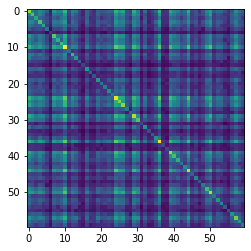

In [7]:
probs = np.array([total_skill_count[s] / builder.n_nurses for s in range(total_skill_count.shape[0])])
plt.imshow(probs)

In [8]:
print(np.mean(builder.job_skill_exp))
print(np.mean(builder.job_skill_cov))
print(builder.job_skill_exp.shape)
print(builder.job_skill_cov.shape)
print(builder.job_skill_prob.shape)

0.3914020733742455
0.015263840313770163
(60,)
(60, 60)
(150, 60)


0.005783041148775894
1.5300870333337317e-05
0.008025445699937225
3.503256132644821e-05


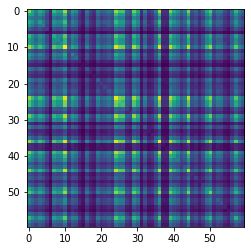

In [9]:
cov = np.cov(probs)
plt.imshow(cov)
cov_mean = np.mean(cov.flatten())
cov_var = np.cov(cov.flatten())
print(cov_mean)
print(cov_var)
cov_mean = np.mean(np.diag(cov))
cov_var = np.cov(np.diag(cov))
print(cov_mean)
print(cov_var)

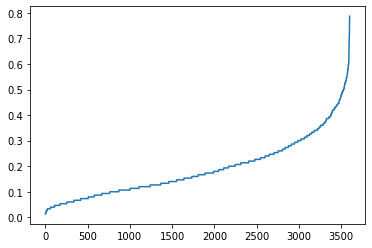

In [10]:
plt.plot(np.sort(probs.flatten()))
plt.show()

In [19]:
cov_diag = np.diag(cov)
diag_mean = np.mean(cov_diag)
diag_std = np.std(cov_diag)
print(diag_mean)
print(diag_std)

0.008521443607449258
0.009005503029052151
